# Maximum Likelihood Parameter Estimation


##Part 1:
A) Let X = amount of time (in minutes) a ice cream man gets a new customer at his cart. The time is known to have an exponential distribution with the average amount of time between a new customer being four minutes.

Plot the probablity density function of the exponential distribution of this ice cream man getting a customer every 4 minutes. 

B) Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically. Does it look similar to the graph above? (20 points)


## Part 2:
Assume that you are given the customer data generated in Part 1, implement a Gradient Descent algorithm from scratch that will estimate the Exponential distribution according to the Maximum Likelihood criterion.

Answer the following:

    Plot the negative log likelihood of the exponential distribution. 

    What is the lambda MLE of the generated data? 

    Plot the estimated lambda vs iterations to showcase convergence towards the true lambda 

## Part 3:
Suppose we have a training set of $m$ independently distributed samples
$\{(x_1,y_1),(x_2,y_2),(x_3,y_3),...,(x_m,y_m)\}$ \\
that is generated from a distribution. \\ 
Assumming a Gaussian model write the expression of the Negative Log Likelihood function $NLL$. \\
Write the parameters $\omega$ and the $\sigma ^2$ that minimize the $NLL$ \\
Write a Python script that uses SGD to converge to $\omega _{ML}$ and $\sigma ^2 _{ML}$ for the following dataset

In [ ]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

#Problem 1a
The equation of the probability density funtion for exponential distribution is: \\
$f(x) = \lambda e^{-\lambda x}$\\
where $\lambda = \frac{1}{\beta}$ and $\beta$ is the average time between the costumers.
The grah bellow shows the probability dencity function.


Text(0.5, 1.0, 'Probability density')

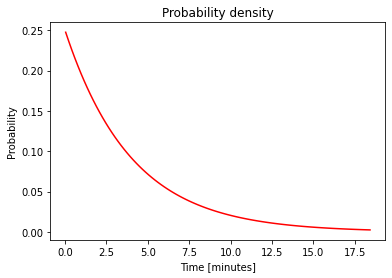

In [ ]:
x = np.linspace(expon.ppf(0.01,0,4), expon.ppf(0.99,0,4), 100)
plt.plot(x, expon.pdf(x,0,4),'r' ,label='expon pdf')
plt.xlabel("Time [minutes]")
plt.ylabel("Probability")
plt.title("Probability density")

#Problem 1b
Bellow I generated 200 samples using the given probability distribution with the average time between costumers 4 minutes ($\lambda = 0.25$). \\
The I ploted the histogram of the resulted arrival time.(blue) \\
On top of my histogram I ploted the probability distribution from above (red) for the comparison purposes. \\
As you can see my generated samples follow the predicted probability distribution.

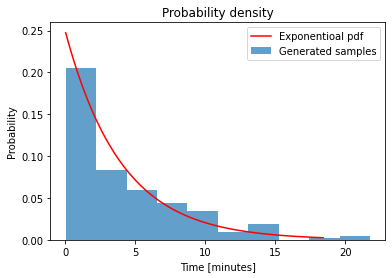

In [ ]:
r = expon.rvs(0,4,size=200)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.7, label = 'Generated samples')
plt.plot(x, expon.pdf(x,0,4),'r' ,label='Exponentioal pdf')
plt.xlabel("Time [minutes]")
plt.ylabel("Probability")
plt.title("Probability density")
plt.legend()

#Part 2

The equation for the likelihood of exponential distribution is: \\
$L(\lambda ,x_1, ... x_n)=\lambda^n e^{-\lambda \sum^n_{i=1} x_i}$ \\
To make it look better we find a negative log of the likelihood: \\
$-log(L)=\lambda \sum^n_{i=1} x_i - nlog(\lambda)$ \\
Down bellow I generated a plot of negative likelehoods for lambdas between 0.01 and 0.99. \\
As you can see the grapg has a minimum value around 0.25 with correspond to the true lambda.

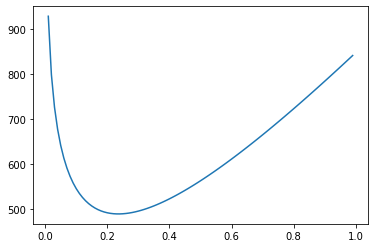

In [ ]:
l = np.linspace(0.01,0.99,99)
log_like = np.zeros(99)
for i in range(99):
  log_like[i]=l[i]*sum(r)-200*np.log(l[i])
plt.plot(l,log_like)

To find the minimum lambda of the data set, we have to fine the derivatibe of lnegative likelihood and equate it to zero: \\
$\frac{d}{d\lambda}(-log(L))=\sum^n_{i=1} x_i - \frac{n}{\lambda} = 0$ \\
from the above equation we find the lambda: \\
$\lambda = \frac{n}{\sum^n_{i=1} x_i}$ \\
where n=200;

In [ ]:
lam_est=200/sum(r)
print("The estimated lambda of the output is {}, which is close to the actual lambda of 0.25".format(lam_est))


The estimated lambda of the output is 0.23571688005745356, which is close to the actual lambda of 0.25


Now we implement gradiend descent algorithm to find the desired lambda. As I stated above, the gradient of the negative loglikelihood is: \\
$\frac{d}{d\lambda}(-log(L))=\sum^n_{i=1} x_i - \frac{n}{\lambda}$ \\
After each iterations the new lambda is: \\
$\lambda_n = \lambda_{n-1}-\eta \bigtriangledown L$ \\
where $\eta$ is the step, I chose it to be 0.00001. \\
I started the gredient descent with the initial prediction of lambda being 0.1. And as you can see after 200 iterations it converges to the estimated lambda from above.

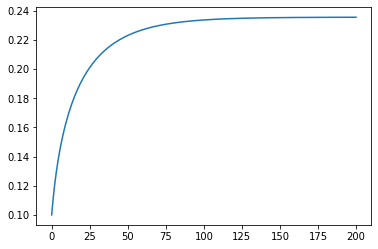

In [ ]:
it=200
x=np.linspace(0,it,it+1)
step = 0.00001
lam=np.zeros(it+1)
pred=0.1
dlog_like = sum(r) - 200/pred
lam[0]=pred
for i in range(1,it+1):
  lam[i]=lam[i-1]-step*dlog_like
  dlog_like = sum(r) - 200/lam[i]
plt.plot(x,lam)

#Problem 3

In [ ]:
def plot(omega):
  plot_x=np.linspace(0,60,60)
  plot_y=np.zeros(60)
  for k in range(60):
    plot_y[k]=omega[1]*plot_x[k]+omega[0]
  plt.plot(plot_x,plot_y, label='best fit')
  plt.plot(x,y,'.',label='data points')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Best fit line")
  plt.legend()

Text(0.5, 1.0, 'Given Data')

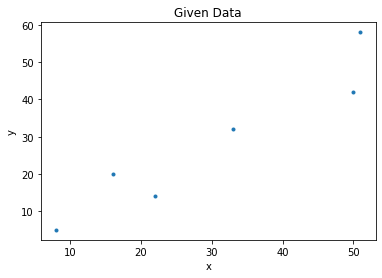

In [ ]:
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])
plt.plot(x,y, ".")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Given Data")

We are given the data above and are told to assume the Gaussian model: \\
$p_{model} (y_i | x_i;\omega) = \frac{1}{\sqrt{2 \pi \delta^2}}e^{-\frac{(y_i-\omega^T x_i)^2}{\delta^2}}$ \\
The likelehood function for the given distribution is: \\
$L(\omega, \delta^2;x_1,...,x_n) = \frac{1}{(\sqrt{2\pi \delta^2})^n}e^{-\frac{1}{2\delta^2}\sum^n_{j=1}{(y_j-\omega^T x_j)^2}}$ \\
Thus we can find the negative log likelihood (NLL) to be: \\
$l=-log(L)=\frac{1}{2\delta^2}\sum^n_{j=1}(y_j-\omega^T x_j)^2+\frac{n}{2}(log(\delta^2)+log(2\pi))$ \\

Since the data set is not big, the optimal omega can be found analyticaly given the formula: \\
$\hat{\omega}=(X^TX)^{-1}X^Ty$ \\
the calculation is done bellow by first adding $x_0=1$ to each of the data sets to introduce the bias variable and the computing the optimal omega using "linlag.inv" and "dot()" functions from the "numpy" library.

For the linear regression the equation is y=mx+b. Our optimal omega is [-2.59159348  1.03638645]. Where m = 1.0363864491844417 and b = -2.591593475533255


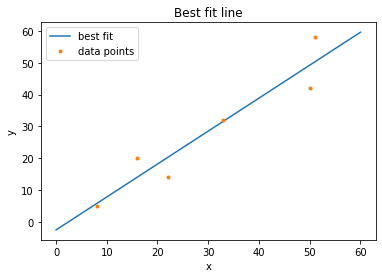

In [ ]:
X_b = np.c_[np.ones((6, 1)), x] # add x0 = 1 to each instance
omega_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("For the linear regression the equation is y=mx+b. Our optimal omega is {}. Where m = {} and b = {}".format(omega_best,omega_best[1],omega_best[0]))
plot(omega_best)

After we found the optimal omega, we can easily find the optimal variance using this equation: \\
$\hat{\delta}^2=\frac{1}{n}\sum^n_{j=1}(y_j-\omega^T x)^2$

In [ ]:
diff = np.zeros(len(X_b))
for i in range(len(X_b)):
  diff[i]=(y[i]-omega_best.T.dot(X_b[i]))**2
variance = 1/(len(X_b))*sum(diff)
print("The optimal variance is",variance)

The optimal variance is 31.231597657883746


Bellow I wrote a simple Stochastic Gradient Descent algorithm to find the best fit line. I didn't use learning schedule and desided to keep the learning rate constant since we have a small data set. \\
My learning rate is 0.0001 and number of epochs is 50. The resilting omega is is not very close to the optimal omega from above because we are using Stochastic GD instead of Batch GD, however it still does a good job fitting the data, as can be seen from the plot.

For the linear regression the equation is y=mx+b. Our optimal omega is [[0.34768383]
 [0.88736938]]. Where m = [0.88736938] and b = [0.34768383]


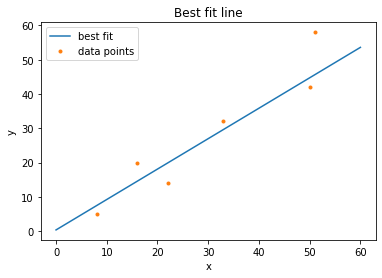

In [ ]:
eta = 0.0001 # learning rate
n_epochs = 50
omega = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  random_index = np.random.randint(len(X_b))
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(omega) - yi)
  omega = omega - eta * gradients
print("For the linear regression the equation is y=mx+b. Omega found by the SGD algorithm is {}. Where m = {} and b = {}".format(omega,omega[1],omega[0]))
plot(omega)

After we found the optimal omega, we can easily find the optimal variance using this equation: \\
$\hat{\delta}^2=\frac{1}{n}\sum^n_{j=1}(y_j-\omega^T x)^2$

In [ ]:
diff = np.zeros(len(X_b))
for i in range(len(X_b)):
  diff[i]=(y[i]-omega.T.dot(X_b[i]))**2
variance = 1/(len(X_b))*sum(diff)
print("Variance found by the SGD algorithm is",variance)

Variance found by the SGD algorithm is 39.47569488306681


The SGD algorithm can also be performed using "SGDRegressor" from "sklearn" library. Which will give us a similar result. It is faster than Batch GD because I only use 50 itterations but it doesn't give a perfect result.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=0.01, penalty='l2', eta0=0.001)
sgd_reg.fit(X_b, y.ravel())
diff = np.zeros(len(X_b))
for i in range(len(X_b)):
  diff[i]=(y[i]-sgd_reg.coef_.T.dot(X_b[i]))**2
variance = 1/(len(X_b))*sum(diff)
print("For the linear regression the equation is y=mx+b. Omega found by the SGD algorithm is {}. Where m = {} and b = {}".format(omega,sgd_reg.coef_[1],sgd_reg.coef_[0]))
print("Variance found by the SGD algorithm is",variance)

For the linear regression the equation is y=mx+b. Omega found by the SGD algorithm is [[0.34768383]
 [0.88736938]]. Where m = 0.8284062606569057 and b = -0.000176047871901971
Variance found by the SGD algorithm is 56.031029030545405
